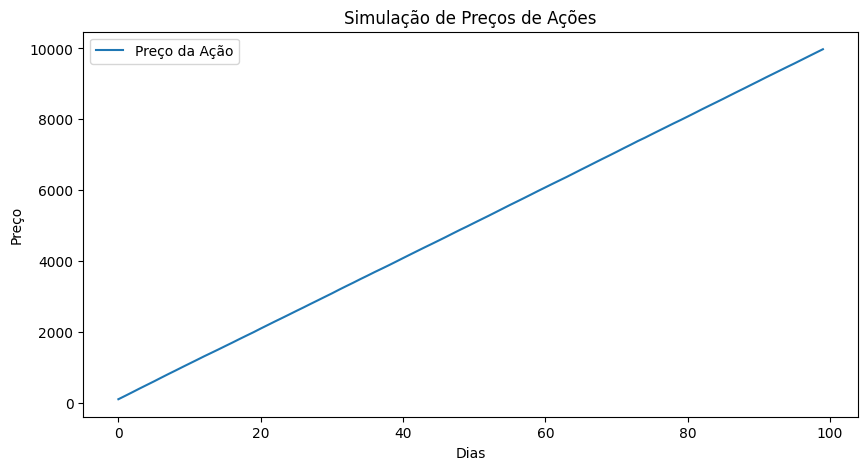

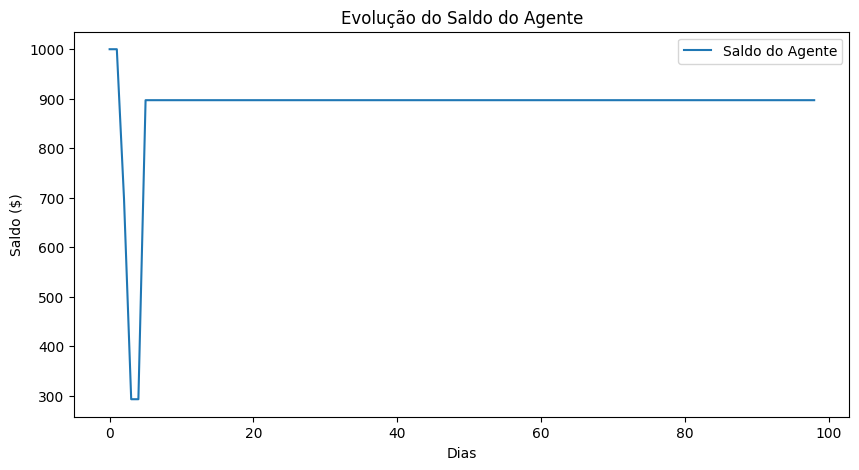

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Simulação de preços de ações (100 dias)
np.random.seed(42)
precos = np.cumsum(np.random.randn(100) * 2 + 100)  # Criando preços fictícios

# Parâmetros do Q-Learning
acoes = [0, 1, 2]  # 0: Manter, 1: Comprar, 2: Vender
q_table = np.zeros((100, len(acoes)))  # Tabela Q inicializada com zeros
gamma = 0.95  # Fator de desconto
alpha = 0.1   # Taxa de aprendizado
epsilon = 1.0  # Exploração inicial
epsilon_decay = 0.995  # Decaimento da exploração
episodios = 500  # Número de episódios

# Treinamento do agente
for episodio in range(episodios):
    saldo = 1000  # Saldo inicial
    acao_atual = None
    for dia in range(len(precos) - 1):
        estado = dia
        if random.uniform(0, 1) < epsilon:
            acao = random.choice(acoes)  # Exploração
        else:
            acao = np.argmax(q_table[estado])  # Exploração baseada na Tabela Q

        # Definição da recompensa
        recompensa = 0
        if acao == 1 and saldo >= precos[dia]:  # Comprar
            acao_atual = precos[dia]
            saldo -= precos[dia]
        elif acao == 2 and acao_atual is not None:  # Vender
            recompensa = precos[dia] - acao_atual  # Lucro ou prejuízo
            saldo += precos[dia]
            acao_atual = None

        proximo_estado = min(dia + 1, len(precos) - 1)
        q_table[estado, acao] = (1 - alpha) * q_table[estado, acao] + \
            alpha * (recompensa + gamma * np.max(q_table[proximo_estado]))

    epsilon *= epsilon_decay  # Redução da exploração

# Teste do agente treinado
saldo = 1000
acao_atual = None
lucros = []
for dia in range(len(precos) - 1):
    estado = dia
    acao = np.argmax(q_table[estado])  # Escolha a melhor ação

    if acao == 1 and saldo >= precos[dia]:  # Comprar
        acao_atual = precos[dia]
        saldo -= precos[dia]
    elif acao == 2 and acao_atual is not None:  # Vender
        saldo += precos[dia]
        acao_atual = None

    lucros.append(saldo)

# Plotando os preços e os ganhos
plt.figure(figsize=(10, 5))
plt.plot(precos, label="Preço da Ação")
plt.xlabel("Dias")
plt.ylabel("Preço")
plt.legend()
plt.title("Simulação de Preços de Ações")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(lucros, label="Saldo do Agente")
plt.xlabel("Dias")
plt.ylabel("Saldo ($)")
plt.legend()
plt.title("Evolução do Saldo do Agente")
plt.show()
